# -----------------------------------------DATASET-FOOD ORDER-------------------------------------

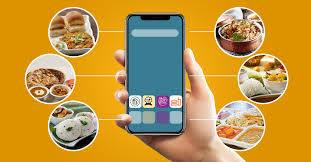

# Dataset Description

The dataset contains : <br>
1.Order ID <br>
2.Order Date <br>
3.Food item name <br>
4.Quantity <br>
5.Product Price <br>
6.Total Products <br>

# Purpose of choosing this dataset for Project

The goal of association rule generation is to find interesting patterns and trends in transaction databases. <br>
Hence,I can use this food dataset of a particular restaurant to find out the relations between food items that are bought together .<br>I will try to make association rules which can help to increase the revenue of the owner.

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('Food order.csv')

In [3]:
df

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
0,25583,03/08/2019 21:58,Tandoori Mixed Grill,1,11.95,12
1,25583,03/08/2019 21:58,Madras Sauce,1,3.95,12
2,25583,03/08/2019 21:58,Mushroom Rice,2,3.95,12
3,25583,03/08/2019 21:58,Garlic Naan,1,2.95,12
4,25583,03/08/2019 21:58,Paratha,1,2.95,12
...,...,...,...,...,...,...
119178,8144,13/02/2017 12:59,House Red wine 75cl,1,17.95,18
119179,7463,03/01/2017 19:13,House white wine 75cl,1,17.95,6
119180,6719,24/11/2016 18:35,House Red wine 75cl,1,17.95,6
119181,5251,21/08/2016 17:55,House white wine 75cl,1,17.95,9


# Data Preprocessing 

In [4]:
df.shape

(119183, 6)

In [5]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119183 entries, 0 to 119182
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Order ID        119183 non-null  int64  
 1   Order Date      119183 non-null  object 
 2   Item Name       119183 non-null  object 
 3   Quantity        119183 non-null  int64  
 4   Product Price   119183 non-null  float64
 5   Total products  119183 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.5+ MB


In [6]:
#statistical summary
df.describe()

,Order ID,Quantity,Product Price,Total products
count,119183.000000,119183.000000,119183.000000,119183.000000
mean,15185.997978,1.248869,5.108173,7.246428
std,6088.427753,0.702203,3.207705,2.946809
min,2096.000000,1.000000,0.500000,1.000000
25%,9908.000000,1.000000,2.950000,5.000000
50%,15191.000000,1.000000,3.950000,7.000000
75%,20517.000000,1.000000,8.950000,9.000000
max,25583.000000,20.000000,17.950000,29.000000


In [7]:
#check null values
df.isnull().sum()

Order ID          0
Order Date        0
Item Name         0
Quantity          0
Product Price     0
Total products    0
dtype: int64

# Exploratory Data Analysis

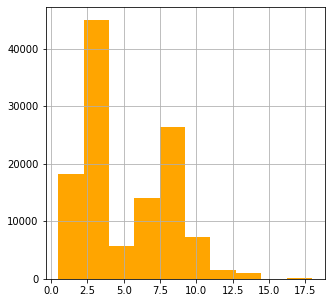

In [8]:
df['Product Price'].hist(figsize=(5,5),color="orange")

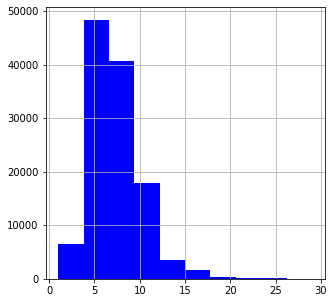

In [9]:
df['Total products'].hist(figsize=(5,5),color="blue")

In [10]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year
df['year'].unique()

array([2019, 2018, 2017, 2016, 2015], dtype=int64)

([<matplotlib.axis.XTick at 0x2095f59f948>,
 <a list of 4 Text xticklabel objects>)

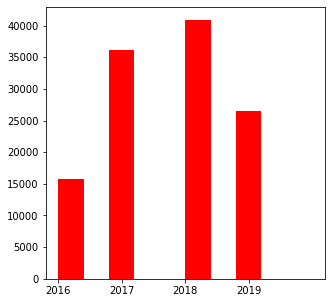

In [11]:
df['year'].hist(figsize=(5,5),color="red",range=[2016,2020],grid=False)
plt.xticks(range(2016, 2020))

# Taking a sample of data

In [12]:
df=df.sample(n=100000)
df

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,year
104921,9010,04/04/2017 19:49,Garlic Mirch Chicken,1,8.95,14,2017
74536,17632,20/07/2018 18:23,Bombay Aloo,1,5.95,7,2018
40394,11444,27/08/2017 19:21,Pilau Rice,1,2.95,7,2017
13333,16047,24/04/2018 17:53,Plain Papadum,6,0.80,11,2018
80919,7803,22/01/2017 17:43,Aloo Brinjal,1,5.95,9,2017
...,...,...,...,...,...,...,...
75628,16037,23/04/2018 17:54,Bombay Aloo,1,5.95,6,2018
48234,24789,26/06/2019 19:03,Mushroom Rice,1,3.95,13,2019
57699,12627,03/11/2017 17:25,Mini Bhaji,1,3.95,13,2017
19529,22908,30/03/2019 17:09,Naan,4,2.50,3,2019


In [13]:
basket = (
    # group data (item name should be grouped in order to unstack later)
    df.groupby(['Order ID', 'Item Name'
    ])['Quantity'].sum()  # Agregate quantity data just to apply unstack, the value doesnt change
    .unstack().reset_index()  # Transform to 1 transaction per row
    .fillna(0)  # fill the products that its not in the order with 0
    .set_index('Order ID')  # set the order number as index
)

print("One order per row with the quantity of each product")
basket.head()

One order per row with the quantity of each product


Item Name,Achar Chicken,Achar Lamb,Aloo Brinjal,Aloo Chaat,Aloo Dupiaza,Aloo Gobi,Aloo Mithy,Aloo Peas,Bangon Hari Mirch,Bhindi Bhajee,...,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo - chicken,Vindaloo - chicken-tikka,Vindaloo - king-prawn,Vindaloo - lamb,Vindaloo - prawn,Vindaloo Sauce
Order ID,,,,,,,,,,,,,,,,,,,,,
2096,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
basket = basket.applymap(lambda quantity: 1 if int(quantity) >= 1 else 0) #changing to 0 and 1 format
 
print("Converted quantity to boolean values")
basket.head()

Converted quantity to boolean values


Item Name,Achar Chicken,Achar Lamb,Aloo Brinjal,Aloo Chaat,Aloo Dupiaza,Aloo Gobi,Aloo Mithy,Aloo Peas,Bangon Hari Mirch,Bhindi Bhajee,...,Vindaloo - Chicken Tikka,Vindaloo - King Prawn,Vindaloo - Lamb,Vindaloo - Prawn,Vindaloo - chicken,Vindaloo - chicken-tikka,Vindaloo - king-prawn,Vindaloo - lamb,Vindaloo - prawn,Vindaloo Sauce
Order ID,,,,,,,,,,,,,,,,,,,,,
2096,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1.APRIORI :

Apriori is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. <br>

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

In [19]:
import time
l=[0.01,0.02,0.03,0.04]
t=[]
for i in l:
    t1=time.time()
    apriori(basket,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

Text(0, 0.5, 'Run Time in ms')

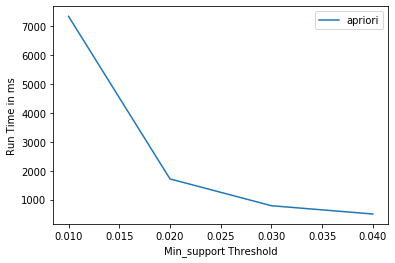

In [20]:
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

# Frequent itemsets:
Given the sets of items and a minimum frequency, any set of items that occurs at least in the number of examples is a frequent itemset.

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.1, use_colnames=True)

print("\nFrequent itemsets using apriori and minimun support equals to %.2f percent" % (0.1*100))
frequent_itemsets.head()

# -------------------------------------------PARAMETERS--------------------------------------------

# 1.Support:
For an association rule X--> Y, the support of the rule is denoted as sup(X-> Y) and is the number of transactions where XUY appears divided by the total number of transactions.

In [ ]:
print(frequent_itemsets)

# 2.Confidence:
Confidence is the number of transactions where XUY appears divided by the number of transactions where X appears.

# Generating Rules
Rules:Rules are if-then statements that help to show the probability of relationships between data items.

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence',min_threshold=0.4)

In [ ]:
rules

NOTE:A lift value greater than 1 indicates that the rule body and the rule head appear more often together than expected, this means that the occurrence of the rule body has a positive effect on the occurrence of the rule head.

# 2.ECLAT

### Eclat is also used for data mining, It calculate the pairs that have been bought more frequently comparing to other pairs. At the end, we expect to see what is the most common combination of products

In [ ]:
item=frequent_itemsets['itemsets']

In [ ]:
len(frequent_itemsets)

In [ ]:
# Putting all transactions in a single list
items = []
for i in range(0,15):
    items.extend(item[i])
uniqueItems = list(set(items))

In [ ]:
uniqueItems

# PAIR OF ITEMS TOGETHER

In [ ]:
pair = []
for j in range(0, len(uniqueItems)):
    k = 1;
    while k <= len(uniqueItems):
        try:
            pair.append([uniqueItems[j], uniqueItems[j+k]])
        except IndexError:
            pass
        k = k + 1;       

In [ ]:
pair

# Score

$ score = \frac{\text{number of lists that contain [item x and item y]}} {\text{number of all lists}} $

In [ ]:
%%time
score = []
for i in pair:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in items if ' + ' and '.join(cond) + ']')
    score.append(len(eval(mycode))/15.)

In [ ]:
ranking_ECLAT = pd.DataFrame([pair, score]).transpose()
ranking_ECLAT.columns = ['Pair', 'Score']

In [ ]:
ranking_ECLAT.sort_values('Score', ascending=False).head()

### BEST PAIR OF RULES GENERATED

In [ ]:
ranking_ECLAT[ranking_ECLAT['Score']>0]

# 3 ITEMS TOGETHER

In [ ]:
# Creating trios
trio = []
for j in range(0, len(uniqueItems)):
    for k in range(j, len(uniqueItems)):
        for l in range(k, len(uniqueItems)):
            if (k != j) and (j != l) and (k != l):
                try:
                    trio.append([uniqueItems[j], uniqueItems[j+k], uniqueItems[j+l]])
                except IndexError:
                    pass 

In [ ]:
trio[:5]

In [ ]:
%%time
score_t = []
for i in trio:
    cond = []
    for item in i:
        cond.append('("%s") in s' %item)
    mycode = ('[s for s in items if ' + ' and '.join(cond) + ']')
    #mycode = "print 'hello world'"
    score_t.append(len(eval(mycode))/15.)

In [ ]:
ranking_ECLAT_trio = pd.DataFrame([trio, score_t]).transpose()
ranking_ECLAT_trio.columns = ['Trio', 'Score']
ranking_ECLAT_trio.sort_values('Score', ascending=False).head(10)

In the three itemsets together,it is observed that score obtained is 0 , which can be concluded from the fact that my dataset does not have 3 items occuring together in an order

# RECOMMENDATIONS

Using the algorithm,the food restaurant can use the output rules to increase their revenue by making a combo offer to increase their profit.Certain combos might make the customer interested to buy 2 food items rather than a single food item.

# BETTER ALGORITHM FOR MY DATASET

Apriori algorithm is used for large datasets and eclat is used for small and medium dataset.Since my dataset contains 1,00,000 rows ,apriori works more efficiently,but is a little slower than Eclat.

# THANK YOU!